<a href="https://colab.research.google.com/github/ElizabethCherrie/Analysis/blob/main/Data_Analisys_Project_2023_e.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Missing Semester 57.

## Final Project

[Source] (https://github.com/esokolov/ml-course-hse/blob/master/2021-fall/homeWorks-practice/homework-practice-02-linreg.ipynb) Parts of Tasks

### About the task
In this task we will try to learn how to analyze data and extract useful features from it. We will also learn how to use `seaborn` and test several statistical hypotheses.


This notebook uses the `folium` library to visualize maps. It runs in google colab!

In [ ]:
#!pip install googletrans==4.0.0-rc1
#from googletrans import Translator
#import json

# Load the notebook
#with open('/content/drive/MyDrive/Colab Notebooks/Data_Analisys_Project_2023', 'r', encoding='utf-8') as f:
#    nb = json.load(f)

#translator = Translator()

# Translate markdown cells
#for cell in nb['cells']:
#    if cell['cell_type'] == 'markdown':
#        text = ''.join(cell['source'])
#        translated = translator.translate(text, src='ru', dest='en').text
#        cell['source'] = [translated]

# Save the translated notebook
#with open('/content/drive/MyDrive/Colab Notebooks/Data_Analisys_Project_2023_e', 'w', encoding='utf-8') as f:
#    json.dump(nb, f, ensure_ascii=False, indent=2)

In [1]:
#!pip install folium

In [2]:
import folium

f = folium.Figure(width=1000, height=500)
m = folium.Map(location=(55.7522200, 37.6155600), tiles="cartodb positron", zoom_start = 10).add_to(f)

political_countries_url = (
    "http://geojson.xyz/naturalearth-3.3.0/ne_50m_admin_0_countries.geojson"
)
#folium.GeoJson(political_countries_url).add_to(m)
m

If you did everything correctly, a map of Moscow should open above.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

import warnings
warnings.filterwarnings('ignore')

## Part 0. Preparation

**Task 1**. We will be working with data from the [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview) competition, which asked to predict the duration of a taxi trip. Download the training set (train.csv) from this competition and upload it:

In [3]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [6]:
df = pd.read_csv("train.csv") #- you can run it this way if you download the dataset and put it in the "Files" folder in the colab
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Pay attention to the `pickup_datetime` and `dropoff_datetime` columns. They contain the start and end date and time of the trip. To make them easier to work with, let's convert the dates to `datetime` objects

In [8]:
import datetime
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])
# here's a tip on how to do it
# source: https://www.delftstack.com/howto/python-pandas/how-to-convert-dataframe-column-to-datetime-in-pandas/#pandas-to_datetime-pd.to_datetime-function-to-convert-dataframe-column-to-pandas-datetime

In [9]:
#check that everything was converted correctly
df.dtypes

,0
id,object
vendor_id,int64
pickup_datetime,datetime64[ns]
dropoff_datetime,datetime64[ns]
passenger_count,int64
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
store_and_fwd_flag,object


The `trip_duration` column contans the trip length in seconds.Let's look at its distribution. To do this, draw its histogram:

What happens if you don't specify a specific range of values? Why is that?

In [10]:
lower = df['trip_duration'].quantile(0.01)
upper = df['trip_duration'].quantile(0.99)
print("Lower threshold:", lower)
print("Upper threshold:", upper)
df_filtered = df[(df['trip_duration'] >= lower) & (df['trip_duration'] <= upper)].copy()

Lower threshold: 87.0
Upper threshold: 3440.0


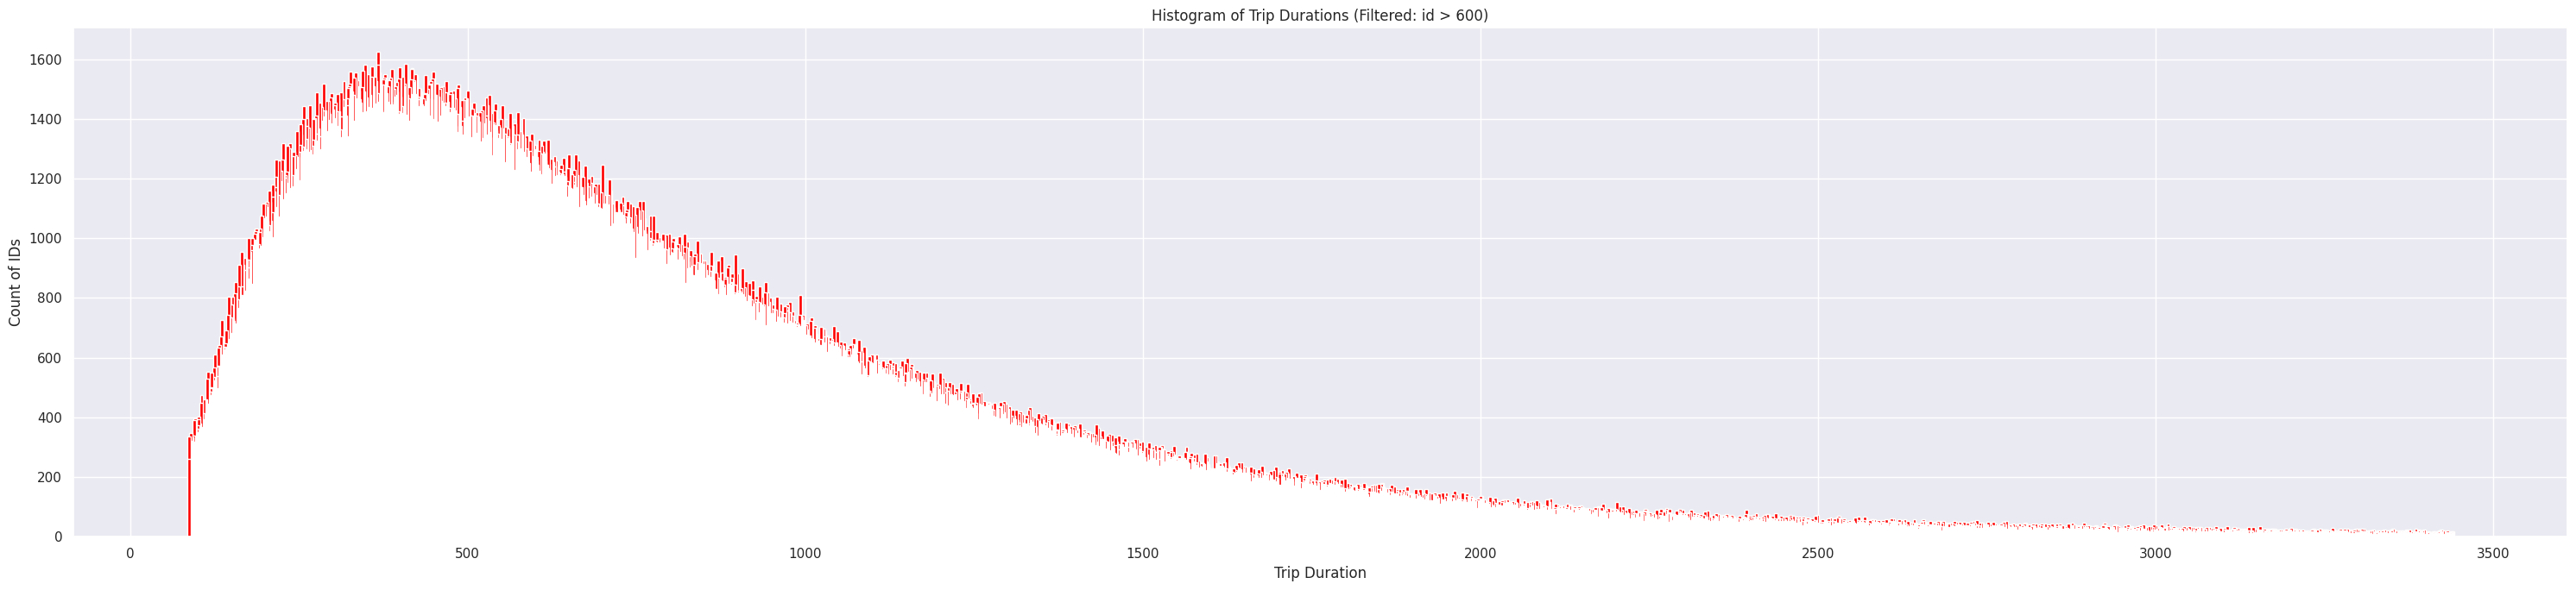

In [11]:
group = df_filtered[['id', 'trip_duration']].groupby('trip_duration', as_index=False).count().sort_values(by='trip_duration', ascending= False)
plt.figure(figsize=(30, 7))
plt.bar(group['trip_duration'], group['id'], color='red', width = 5)
plt.xlabel('Trip Duration')
plt.ylabel('Count of IDs')
plt.title('Histogram of Trip Durations (Filtered: id > 600)')
plt.tight_layout()
plt.show()

#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

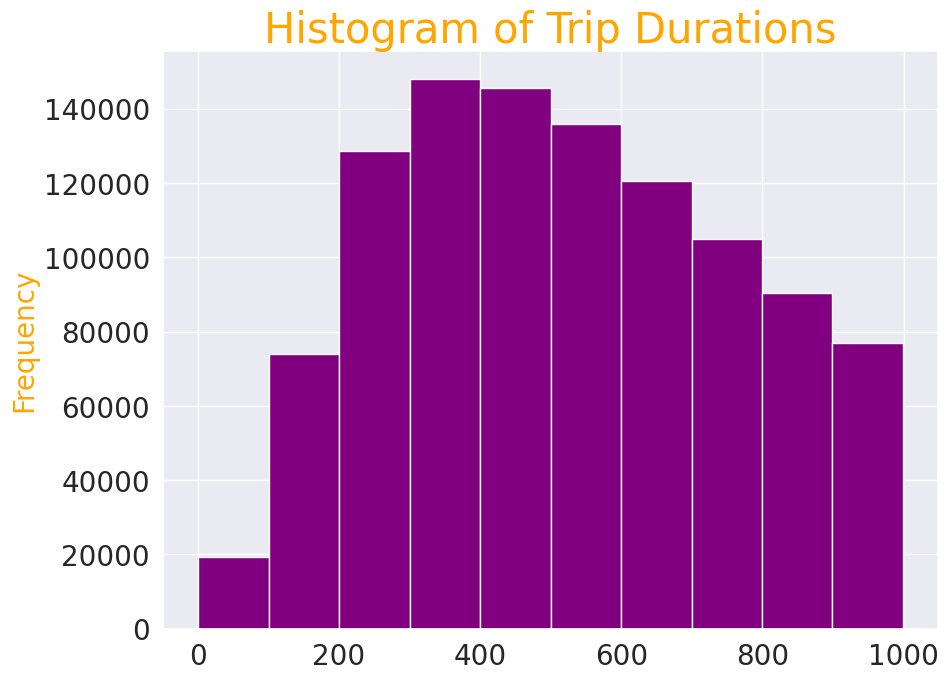

In [12]:
plt.figure(figsize = (10, 7.5))
plt.ylabel('ylabel', fontsize=20, color = "orange")
plt.title("Histogram of Trip Durations", fontsize=30, color = "orange")
plt.yticks(rotation=0)
df[df["trip_duration"] < 1000]["trip_duration"].plot(kind = "hist", fontsize = 20, rot = 0, color = "purple")
plt.show()

**Question**: What can be said about the target variable from the histogram of its values?

## Part 1. Learning `pickup_datetime`

**Task 2**. First, let's look at how many trips there were on each day. Plot a graph of the number of trips as a function of the day of the year (for example, you can use `sns.countplot`):

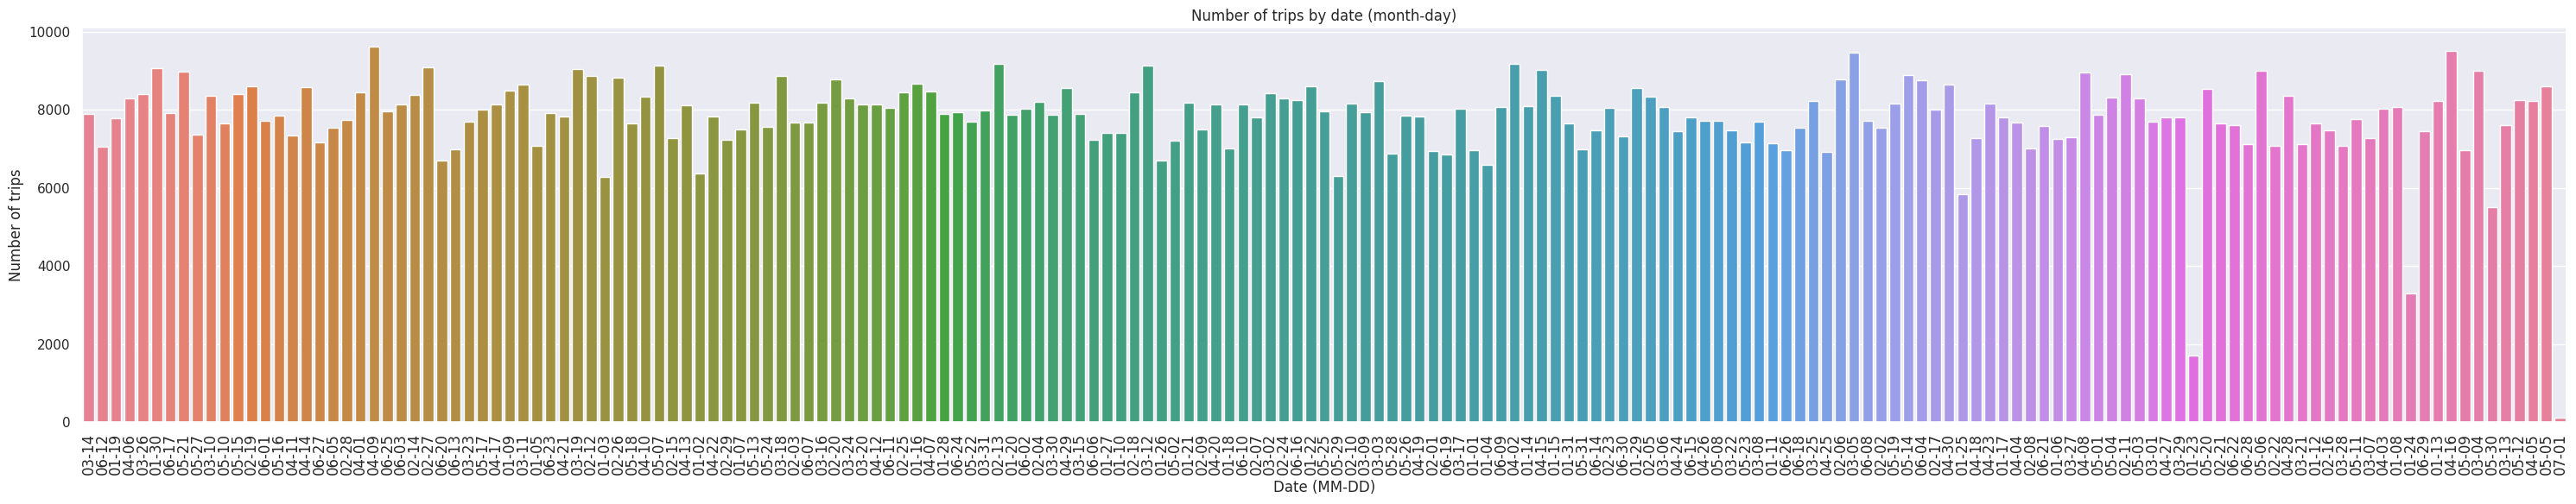

In [13]:
# here's a tip on how to do it
# groupby month, day: https://github.com/pandas-dev/pandas/issues/21075
df_filtered['month_day'] = df_filtered['dropoff_datetime'].dt.strftime('%m-%d')

plt.figure(figsize=(30, 6))
sns.countplot(data=df_filtered, x='month_day', palette='husl')

plt.xticks(rotation=90, fontsize=12)
plt.xlabel('Date (MM-DD)')
plt.ylabel('Number of trips')
plt.title('Number of trips by date (month-day)')
plt.tight_layout()
plt.show()

**Question**: You may have noticed that there are 2 periods on the chart with abnormally low numbers of trips. Figure out what dates these downward jumps occurred and find information about what was happening in New York on those days.

On January 23–24, 2016, New York City experienced a historic blizzard, the most significant snowstorm in the city's history. The storm, informally named "Winter Storm Jonas," began on January 22 and intensified overnight on January 23. It brought heavy snow, high winds, and poor visibility to the eastern United States.

**Task 3**. Draw on one graph the dependence of the number of trips on the hour per day for different months (color different curves corresponding to different months in different colors, use `hue` in `sns.relplot`). Similarly, draw the dependence of the number of trips on the hour per day for different days of the week.

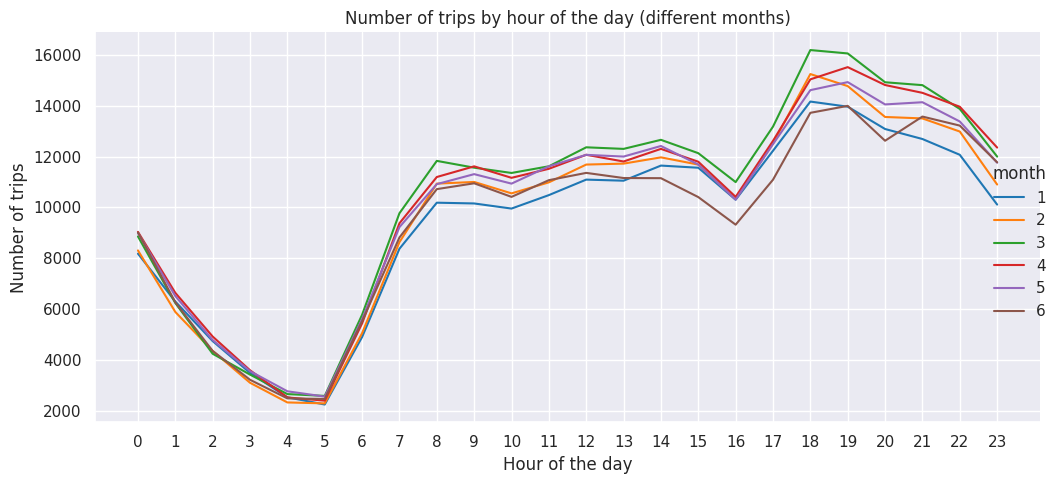

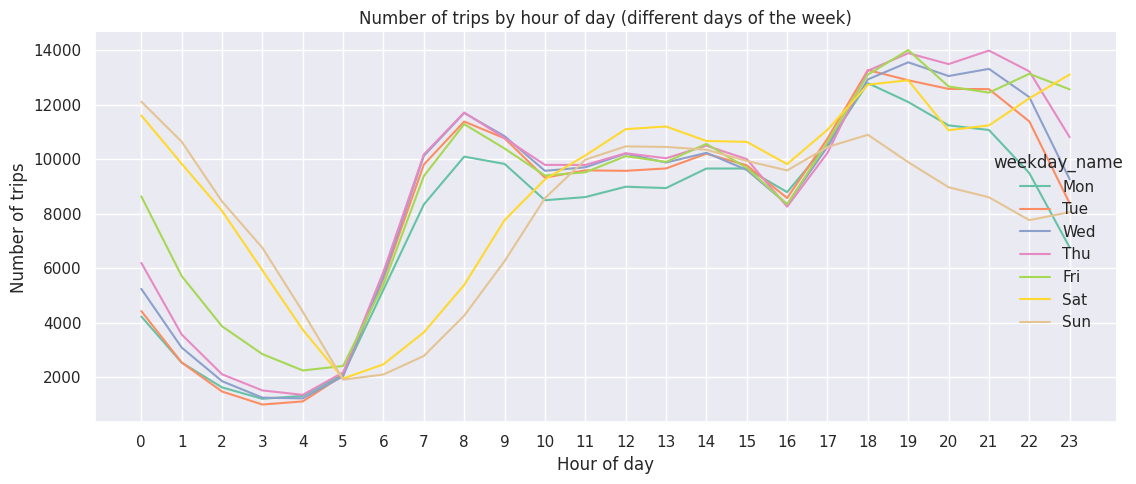

In [14]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

df_filtered['hour'] = df_filtered['pickup_datetime'].dt.hour
df_filtered['month'] = df_filtered['pickup_datetime'].dt.month


hour_month = df_filtered.groupby(['month', 'hour']).size().reset_index(name='trip_count')

g = sns.relplot(
    data=hour_month,
    x='hour',
    y='trip_count',
    hue='month',
    kind='line',
    height=5,
    aspect=2,
    palette='tab10'
).set(
title='Number of trips by hour of the day (different months)',
xlabel='Hour of the day',
ylabel='Number of trips'
)

g.ax.set_xticks(np.arange(0, 24, 1))

plt.tight_layout()
plt.show()

df_filtered['weekday'] = df_filtered['dropoff_datetime'].dt.dayofweek

weekday_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df_filtered['weekday_name'] = df_filtered['weekday'].map(lambda x: weekday_names[x])

df_filtered['weekday_name'] = pd.Categorical(df_filtered['weekday_name'], categories=weekday_names, ordered=True)

hour_weekday = df_filtered.groupby(['weekday_name', 'hour']).size().reset_index(name='trip_count')

g2 = sns.relplot(
data=hour_weekday,
x='hour',
y='trip_count',
hue='weekday_name',
kind='line',
height=5,
aspect=2,
palette='Set2'
).set(
title='Number of trips by hour of day (different days of the week)',
xlabel='Hour of day',
ylabel='Number of trips'
)
g2.ax.set_xticks(np.arange(0, 24, 1))

plt.tight_layout()
plt.show()

**Question**: What conclusions can be drawn based on the graphs above? Are there any days of the week? Month? Time of day? What is the reason for this?

Add the following signs based on `pickup_datetime`:
1. Day of the week
2. Month
3. Hour
4. Is the period anomalous (two binary features corresponding to two abnormal periods)
5. Number of the day a year

In [15]:
df_filtered['weekday'] = df_filtered['pickup_datetime'].dt.dayofweek
df_filtered['month'] = df_filtered['pickup_datetime'].dt.month
df_filtered['anomaly_period_1'] = df_filtered['pickup_datetime'].isin(pd.to_datetime(['2016-01-23','2016-01-24'])).astype(int)
df_filtered['anomaly_period_2'] = ((df_filtered['hour'] >= 3) & (df_filtered['hour'] <= 6)).astype(int)
df_filtered['day_of_year'] = df_filtered['pickup_datetime'].dt.dayofyear
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

So, we have already created a certain number of signs.

**Question**: Which of the signs should be considered as categorical and which - as numerical? Why?

## Part 2. We study the coordinates
 We have already studied the data on the start time of the trip very well, let's now look at information about the coordinates of the beginning and end of the trip.For you, a function has been prepared that draws the points of the beginning or end of the trip on the map.You will find examples of its call below.Please note that we convey only a small piece of data to this function, it will take a very long time to work for a very long time

In [16]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.

    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

In [17]:
show_circles_on_map(df_filtered.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

In [18]:
show_circles_on_map(df_filtered.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

**Question**: What two points stand out on the map?

Two airports JFK and EWR

In [19]:
df_filtered.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,month_day,hour,month,weekday,weekday_name,anomaly_period_1,anomaly_period_2,day_of_year
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,03-14,17,3,0,Mon,0,0,74
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,06-12,0,6,6,Sun,0,0,164
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,01-19,11,1,1,Tue,0,0,19
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,04-06,19,4,2,Wed,0,0,97
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,03-26,13,3,5,Sat,0,0,86


**Task 4**.As we all remember very well, $ t = s / v _ {\ text {cr}} $, so it is obvious that the strongest sign will be the distance that must be driven.We cannot calculate the exact distance that we need to overcome the taxi, but we can evaluate it by considering the shortest distance between the points of the beginning and the end of the trip.To correctly calculate the distance between two points on Earth, you can use the `HAVERSINE` function.Calculate the shortest distance for objects and write it into the column `hasine`:

In [20]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

def haversine_vectorized(lon1, lat1, lon2, lat2):
    R = 6371
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

In [21]:
df_filtered["haversine"] = haversine_vectorized(
    df_filtered["pickup_longitude"].values,
    df_filtered["pickup_latitude"].values,
    df_filtered["dropoff_longitude"].values,
    df_filtered["dropoff_latitude"].values
)

In [22]:
df_filtered["haversine"].head()

,haversine
0,1.498521
1,1.805507
2,6.385098
3,1.485498
4,1.188588


**Task 5**.Let's study the average taxi speed.Calculate the average speed for each sample object, dividing `Haversine` into` trip_duration`, and draw a histogram of its distribution

In [23]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df_filtered["speed"] = df_filtered["haversine"] / (df_filtered["trip_duration"] / 3600)

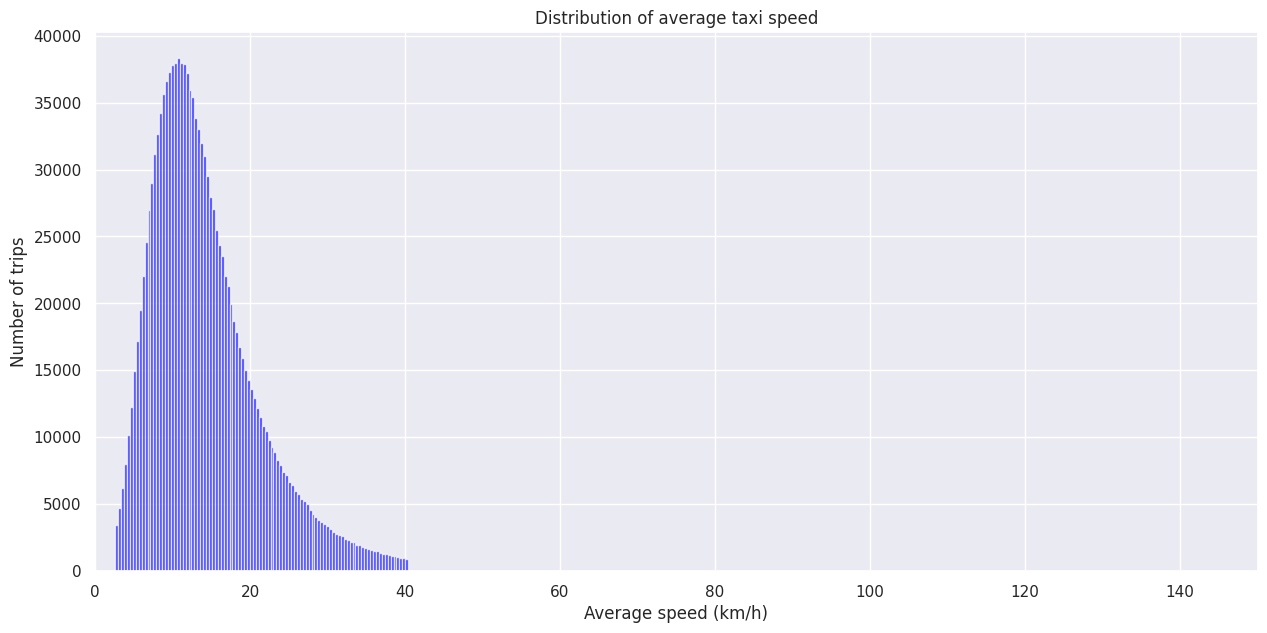

In [36]:
plt.figure(figsize=(15,7))
plt.hist(df_filtered["speed"], bins=100, color="blue", alpha=0.7)
plt.xlabel("Average speed (km/h)")
plt.ylabel("Number of trips")
plt.title("Distribution of average taxi speed")
plt.xlim(0, 150)
plt.show()

As you can see in the histogram, for some objects we have very much more speeds. Draw a histogram by objects for which the speed value turned out to be reasonable (for example, you can not include consideration of objects where the speed is more than some quantili):

In [37]:
lower = df_filtered['speed'].quantile(0.01)
upper = df_filtered['speed'].quantile(0.99)
print("Lower threshold:", lower)
print("Upper threshold:", upper)

Lower threshold: 3.7338723914797725
Upper threshold: 35.9548609010739


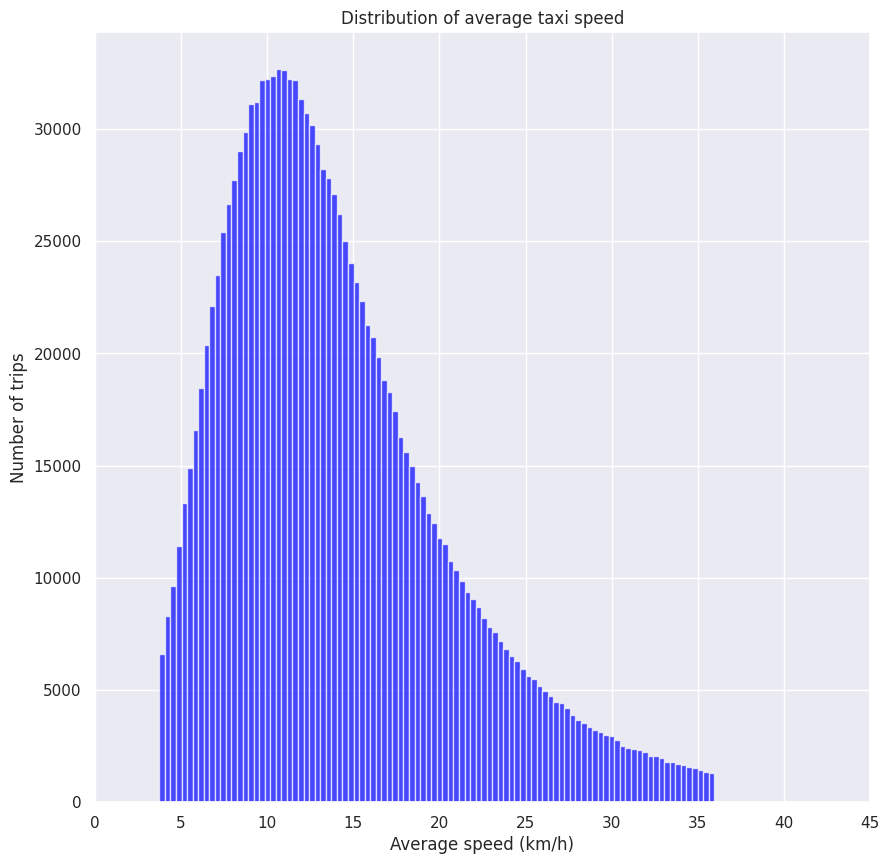

In [38]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df_filtered = df_filtered[(df_filtered['speed'] >= lower) & (df_filtered['speed'] <= upper)].copy()
plt.figure(figsize=(10,10))
plt.hist(df_filtered["speed"], bins=100, color="blue", alpha=0.7)
plt.xlabel("Average speed (km/h)")
plt.ylabel("Number of trips")
plt.title("Distribution of average taxi speed")
plt.xlim(0, 45)
plt.show()

For each pair (day of the week, an hour of day), count the speed median.Draw a schedule with `sns.heatmap`, where the days of the week and hours will be along the axes, and the speed of the function is the value of the function

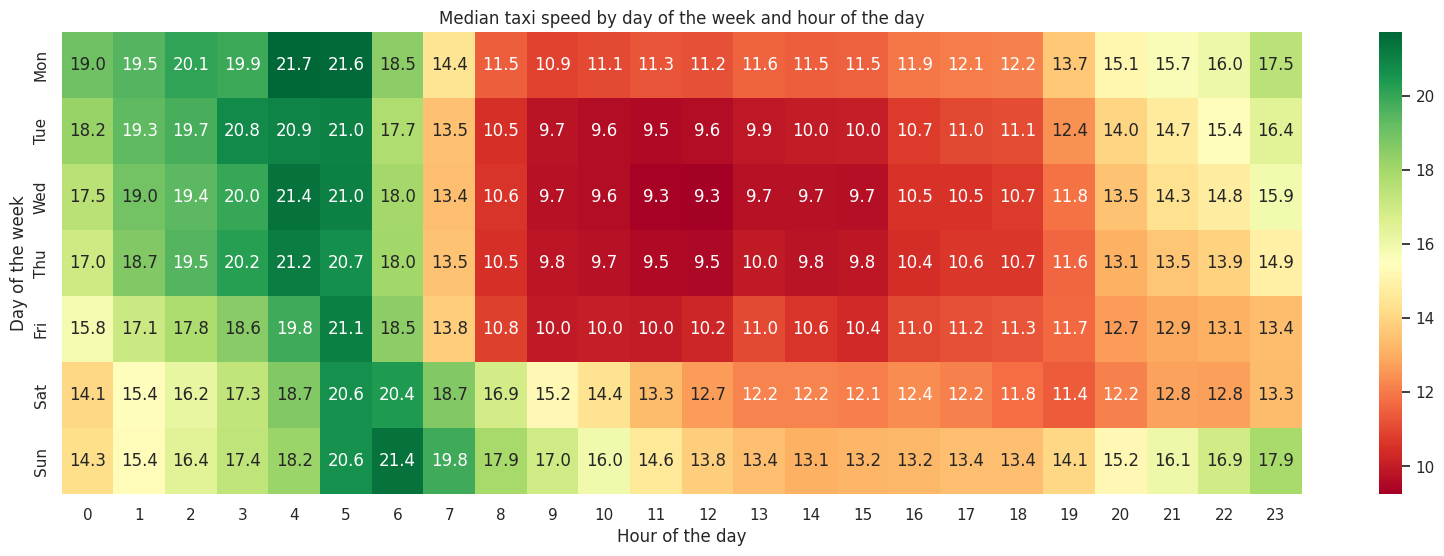

In [39]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
median_speeds = df_filtered.groupby(['weekday', 'hour'])['speed'].median().unstack()

median_speeds.index = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]

plt.figure(figsize=(20,6))
sns.heatmap(median_speeds, cmap="RdYlGn", annot=True, fmt=".1f")
plt.title("Median taxi speed by day of the week and hour of the day")
plt.xlabel("Hour of the day")
plt.ylabel("Day of the week")
plt.show()

**Task 6**.As already noted above, two points are distinguished on the map away from Manhattan.For each of them, add two signs to the sample: whether the trip began in it and whether it ended in it.

In [40]:
jfk_coords = (40.6413, -73.7781)
lga_coords = (40.7769, -73.8740)

In [43]:
df_filtered.head(6)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,month_day,hour,month,weekday,weekday_name,anomaly_period_1,anomaly_period_2,day_of_year,haversine,speed
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,03-14,17,3,0,Mon,0,0,74,1.498521,11.856428
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,06-12,0,6,6,Sun,0,0,164,1.805507,9.803659
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,01-19,11,1,1,Tue,0,0,19,6.385098,10.822201
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,04-06,19,4,2,Wed,0,0,97,1.485498,12.465721
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,03-26,13,3,5,Sat,0,0,86,1.188588,9.836594
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,...,01-30,22,1,5,Sat,0,0,30,1.098942,8.930458


In [47]:
threshold_km = 1

df_filtered["pickup_jfk"] = haversine_vectorized(
    df_filtered["pickup_longitude"], df_filtered["pickup_latitude"],
    jfk_coords[1], jfk_coords[0]
) <= threshold_km

df_filtered["dropoff_jfk"] = haversine_vectorized(
    df_filtered["dropoff_longitude"], df_filtered["dropoff_latitude"],
    jfk_coords[1], jfk_coords[0]
) <= threshold_km

df_filtered["pickup_lga"] = haversine_vectorized(
    df_filtered["pickup_longitude"], df_filtered["pickup_latitude"],
    lga_coords[1], lga_coords[0]
) <= threshold_km

df_filtered["dropoff_lga"] = haversine_vectorized(
    df_filtered["dropoff_longitude"], df_filtered["dropoff_latitude"],
    lga_coords[1], lga_coords[0]
) <= threshold_km

In [48]:
print("Number of pickups at JFK:", df_filtered["pickup_jfk"].sum())
print("Number of dropoffs at JFK:", df_filtered["dropoff_jfk"].sum())
print("Number of pickups at LGA:", df_filtered["pickup_lga"].sum())
print("Number of dropoffs at LGA:", df_filtered["dropoff_lga"].sum())

Number of pickups at JFK: 13113
Number of dropoffs at JFK: 3519
Number of pickups at LGA: 17768
Number of dropoffs at LGA: 9534


In [49]:
df_filtered[df_filtered["pickup_jfk"] & df_filtered["dropoff_jfk"]].head(3)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,weekday_name,anomaly_period_1,anomaly_period_2,day_of_year,haversine,speed,pickup_jfk,dropoff_jfk,pickup_lga,dropoff_lga
21078,id0999488,1,2016-05-31 17:23:43,2016-05-31 17:29:52,1,-73.782410,40.644257,-73.776520,40.645065,N,...,Tue,0,0,152,0.505005,4.926880,True,True,False,False
23695,id3678551,1,2016-03-25 09:55:34,2016-03-25 09:58:44,1,-73.789459,40.641869,-73.781799,40.644627,N,...,Fri,0,0,85,0.715358,13.554150,True,True,False,False
36357,id0047755,2,2016-02-06 20:29:20,2016-02-06 20:35:34,5,-73.780365,40.645424,-73.788437,40.641579,N,...,Sat,0,0,37,0.804136,7.740348,True,True,False,False


## Part 3. Last counting

**Task 7**.There are atypical objects in our data: with an abnormally small trip time or with a very large distance.In this task, it is proposed to exclude such objects from the training sample.To do this, draw a histogram of the distribution of the above values, select objects that can be called emissions, and clean the training sample from them.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

## Part 4. Statistics

**Task 8**.Check the hypothesis that the length of the trip and the number of passengers are independent random values ​​using the chi-quadratic criterion

In [50]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df_filtered.head(1)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,weekday_name,anomaly_period_1,anomaly_period_2,day_of_year,haversine,speed,pickup_jfk,dropoff_jfk,pickup_lga,dropoff_lga
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.96463,40.765602,N,...,Mon,0,0,74,1.498521,11.856428,False,False,False,False


In [51]:
from scipy.stats import chi2_contingency

In [52]:
def categorize_distance(h):
    if h < 3:
        return 'short'
    elif h <= 10:
        return 'medium'
    else:
        return 'long'

df_filtered['trip_distance_cat'] = df_filtered['haversine'].apply(categorize_distance)

sample_df = df_filtered.sample(n=10000, random_state=42)
sample_df['passenger_count'] = sample_df['passenger_count'].astype(str)

contingency_table = pd.crosstab(sample_df['trip_distance_cat'], sample_df['passenger_count'])
print(contingency_table)

chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi2 statistic:", chi2)
print("p-value:", p)

passenger_count       1    2    3    4    5    6
trip_distance_cat                               
long                305   66   18   13   22   10
medium             2089  413  117   51  142  104
short              4738  946  299  127  318  222
Chi2 statistic: 6.525511105310575
p-value: 0.769350938298171


P value is more than 0.05, which means the magnitude is independent.

In [53]:
from scipy.stats import spearmanr

corr, p_value = spearmanr(df_filtered['trip_duration'], df_filtered['passenger_count'])
print("Spearman correlation:", corr)
print("p-value:", p_value)

Spearman correlation: 0.02149075315842362
p-value: 5.995742517518264e-140


**Task 9**.Check the hypothesis that the average length of the trip is 20 minutes

In [54]:
from scipy.stats import ttest_1samp

In [55]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
trip_durations = df_filtered['trip_duration']

t_stat, p_value = ttest_1samp(trip_durations, popmean=1200)

print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -811.4516277711028
p-value: 0.0


**Task 10**.Check the hypothesis that the length of the trip is normally $ n (700, 30,000) $

In [56]:
from scipy.stats import shapiro

In [57]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

stat, p_value = shapiro(df_filtered['trip_duration'].sample(5000, random_state=42))
print("Shapiro-Wilk statistic:", stat)
print("p-value:", p_value)

Shapiro-Wilk statistic: 0.866342504107932
p-value: 3.231833524286453e-54


Insert a picture describing your experience in performing this Homework.

<IMG SRC = "https://i.redd.it/ltzsp7sc4fec1.gif" Width = "400" align = "Center">